In [1]:
# 7장 시작

In [2]:
# 너무 세세하게 다 치지 말고 개념+ 핵심만 적어두자

#### 07-1 Perceptron
초기 인공신경망 

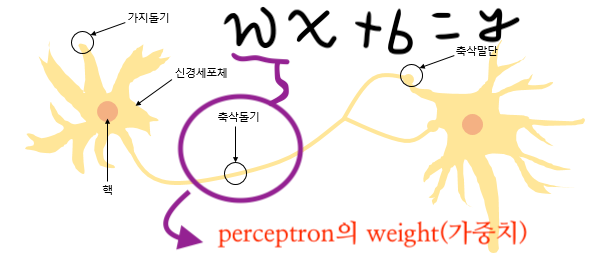  

##### more weight -> more important  
##### Activation function으로 Step function 사용  

    what is activation function?? : 
* `입력 신호의 총합을 출력 신호로 변환하는 함수`
        입력 신호의 총합이 `활성화를 일으키는지`를 정하는 역할
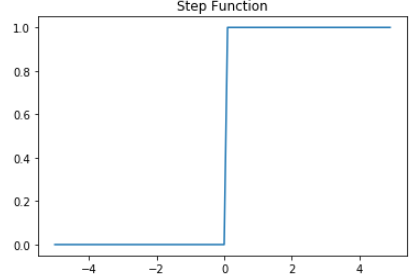  

수식으로 써보면 Perceptron은  
$f(\sum_i^{n} w_{i}x_{i} + b)$  
대신 f가 step func  

---  
##### activation function의 특징 
* NONLINEARITY(비선형성) : 
    think of y= f(x)  , if f(x) is linear -> f(f(f(f(f(x))))) is also linear  
    if we keep making that function composition , it does finally conclude to linear function.  

---  
perceptron의 layer(층)이 여러개면 MLP(multi layer perceptron)  
1개면 SLP(single layer perceptron)  

참고로 SLP는 이렇게 생김  
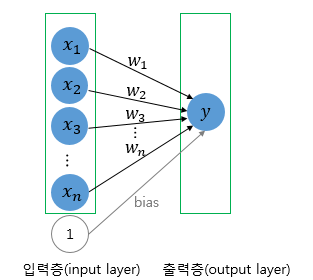  
SLP 생긴걸 보니 gate를 표현할 수 있게 생겼지?(and , or , nor 이런거 )  

#### 다만 , XOR게이트는 표현할 수 없는데,,   
그 이유는 xor은 같으면 0 서로 달라야 1 인 변태적인 놈인데
그럴려면 아래 그림처럼 두개의 layer가 있어야함  
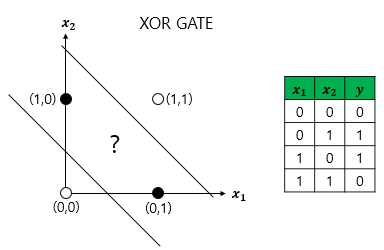  

그래서 MLP 사용하는거임. 사용하면 이렇게 표현 가능  
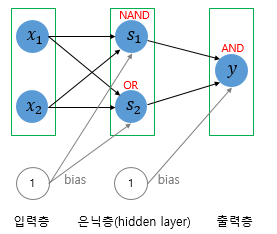  

점점 층이 쌓이면  
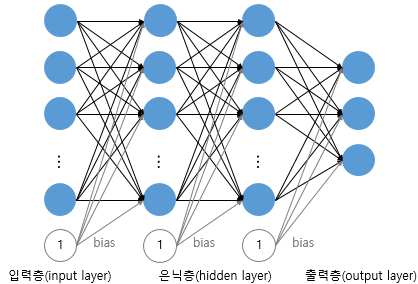  
DNN(Deep Neural network ) : 심층 인공 신경망이 되죠.  

---   
MLP나 DNN이나 거기서 거기. DNN이 좀 더 넓은 개념이라고 보면 될듯  
FFN(Feed forward network) : 순방향 망  
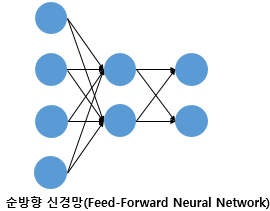   
RNN(Recurrent Neural network) : 순환 신경망  
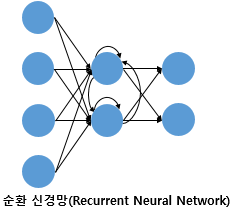   
   

In [3]:
# 반면 워드 임베딩으로부터 얻은 임베딩 벡터는 상대적으로 저차원을 가지며 모든 원소의 값이 실수입니다.
# 단어를 원-핫 벡터로 만드는 과정을 원-핫 인코딩이라고 한다면, 단어를 밀집 벡터로 만드는 작업을 워드 임베딩(word embedding) 이라고 합니다.
#  밀집 벡터는 워드 임베딩 과정을 통해 나온 결과므로 임베딩 벡터(embedding vector)라고도 합니다.
#  원-핫 벡터의 차원이 주로 20,000 이상을 넘어가는 것과는 달리 임베딩 벡터는 주로 256, 512, 1024 등의 차원을 가집니다.
#  임베딩 벡터는 초기에는 랜덤값을 가지지만, 인공 신경망의 가중치가 학습되는 방법과 같은 방식으로 값이 학습되며 변경됩니다



---   
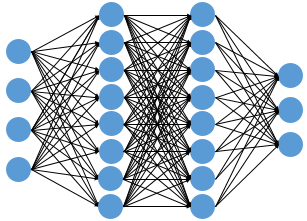  
위의 MLP를 keras로 구현해보자면 다음과 같다  


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax')) # 마지막 softmax -> multi class classification의 최종 활성화 함수
# to make all the outputs result to 1

# all these are sequential -> 이렇게 하는걸 잘 봐두셈 

2023-03-31 15:49:02.858649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 15:49:08.462883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---  
##### 07-4 DL 학습 방법  
1. 일단 loss func , cost func, objective func의 차이를 알 자  
* loss func : is usually a function defined on a data point , prediction and label, and measures the penalty -> 특정 값과 parameter를 설정해서 어떤 `single 결과값`이 나오는 수식??  
cost func : loss func의 합 (예를 들면 MSE, RMSE같은것들 ) -> usually more general + sum of loss func. 순간순간의 loss를 판단할때는 loss func을 쓰고, 학습이 완료된 다음에는 cost func을 쓰면 됨  
objective func : 최대,최소값을 구하는 가장 일반적인 func  
---  

정리하자면 각각의 범위 차이  
### loss func <= cost func <= objective func 

보통 오차가 클 수록 loss func의 값은 크고  
오차가 작을 수록 loss func의 값은 작아집니다.  

회귀(regression)에서는 평균 제곱 오차(MSE), 분류(classification) 문제에서는 크로스 엔트로피(cross entropy)를 주로 손실 함수로 사용합니다.  
`손실 함수의 값을 최소화하는` 두 개의 매개변수인 `가중치 w와 편향 b`의 값을 찾는 것이 딥 러닝의 학습 과정이므로 손실 함수의 선정은 매우 중요합니다. 앞서 설명했던 손실 함수를 정리해봅시다.

In [ ]:
# 1. MSE(mean squared error) 
model.compile(optimizer='adam' , loss = 'mse' , metrics=['mse'])
# 이렇게 compile의 loss 에 문자열 'mse'라고 쓸 수 있음
# 위의 코드는 아래처럼 쓸 수도 있음
model.compile(optimizer='adam' , loss = tf.keras.losses.MeanSquaredError() , metrics = ['mse'])
# 보통 NLP는 대부분 classification이라서 MSE보다는 CE를 씀

In [3]:
# 2. 이진 크로스 엔트로피 (binary Cross Entropy) 
# 출력 층에서 sigmoid 함수를 사용하는 이진분류의 경우, binary_crossentropy를 사용함. 
# compile의 loss 에 문자열로 'binary_crossentropy'를 기재해주면 됨 -> logistic regression에서 사용했던 loss func
model.compile(loss ='binary_crossentropy' , optimizer = 'adam', metrics = ['acc'])
model.compile (loss = tf.keras.losses/BinaryCrossentropy(), ~~ )

In [ ]:
# 3. categorical cross entropy  
# also called as 범주형 크로스엔트로피 -> 출력층에서 softmax 함수 사용 하는 
# 다중 클래스 분류일때 categorical_crossentropy를 사용한다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])


In [ ]:
# 만약 label에 대해 one hot encoding을 생략하고, 정수값을 가진 label에 대해 다중 클래스 분류를 하고 싶으면 
# SPARSE하게 하면 되겠져 -> sparse_categorical_crossentropy 를 사용함
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

